#Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

### **Setup**

Let's import the dataset by cloning a local repository which has the copy of the above dataset. This helps in easy access throughout the notebook

In [0]:
!git clone https://github.com/priyanka-debnath/cs6220-sp20.git

Cloning into 'cs6220-sp20'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


We now move to the right folder for quick access.

In [0]:
cd cs6220-sp20/datasets/movie-lens/

/content/cs6220-sp20/datasets/movie-lens


### **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas and set its max results as 1000 so as to see a good number of results.

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

Next we will import each of the three tables from the dataset and assign names to each of the columns:

In [0]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

Let us take a look at the sample data that we just imported.

In [0]:
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [0]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
ratings[:10]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to use as the merge (or join) keys based on overlapping names:

In [0]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:

In [0]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):


In [0]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [0]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:

In [0]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [0]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:5]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


Likewise, for males:

In [0]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:5]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [0]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [0]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:

In [0]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


## Assignment 1

###  • [10 pts] An aggregate of the movie ratings for each particular genre, e.g., Action, Adven- ture, Drama, Science Fiction, ...

We also saw how some movies belong to more than one genre and have the pipe separator in the same row to denote the movie belongs to all the genres included. Since it is always better to analyse flattened data, so let us split it:

In [0]:
data = data.set_index(data.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, data.columns]
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
2101810,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
2101811,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy
2101812,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Drama
2101813,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Western


We can use the NumPy library for calculating the various numerical functions.

In [0]:
import numpy as np

agg_ratings = data.groupby('genres').agg({'rating': [np.mean]})
agg_ratings

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Crime,3.708679
Documentary,3.933123
Drama,3.766332



### • [10 pts] The top 5 highest ranked genre by women.

We sort the genres with the highest mean rating by females:

In [0]:
mean_genre_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
mean_female_genre_ratings = mean_genre_ratings['F'].sort_values(ascending=False)
mean_female_genre_ratings

genres
Film-Noir      4.018087
Documentary    3.946392
War            3.893138
Musical        3.809108
Drama          3.765662
Animation      3.744702
Crime          3.689332
Mystery        3.686548
Romance        3.673579
Thriller       3.573360
Children's     3.572548
Comedy         3.571938
Western        3.551913
Fantasy        3.513076
Adventure      3.512879
Action         3.490252
Sci-Fi         3.450255
Horror         3.202870
Name: F, dtype: float64

Now to get just the top 5 Genres, we print the indices.

In [0]:
top_female_genres = mean_female_genre_ratings.index.tolist()
top_female_genres[:5]

['Film-Noir', 'Documentary', 'War', 'Musical', 'Drama']


### • [10 pts] The top 5 highest ranked genre by men.

We sort the genres with the highest mean rating by males:

In [0]:
mean_genre_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
mean_male_genre_ratings = mean_genre_ratings['M'].sort_values(ascending=False)
mean_male_genre_ratings

genres
Film-Noir      4.092254
Documentary    3.928811
War            3.893375
Drama          3.766589
Crime          3.713720
Mystery        3.662009
Animation      3.661335
Western        3.655120
Musical        3.596332
Romance        3.573262
Thriller       3.569685
Comedy         3.503667
Action         3.491386
Sci-Fi         3.469952
Adventure      3.468125
Fantasy        3.426603
Children's     3.358961
Horror         3.217891
Name: M, dtype: float64

Now to get just the top 5 Genres, we print the indices.

In [0]:
top_male_genres = mean_male_genre_ratings.index.tolist()
top_male_genres[:5]

['Film-Noir', 'Documentary', 'War', 'Drama', 'Crime']

### • [20 pts] Pick a movie of your choice and provide a breakdown of the movie’s ratings by 3 age ranges (a) under 18 (b) 19 to 45 (c) Above 45.

Let us first look at the range of ages we have in the dataset

In [0]:
age_range = data.age.unique()
age_range.sort()
age_range

array([ 1, 18, 25, 35, 45, 50, 56])

Now we can assign an age group description to every age value out of the three we need for the analysis

In [0]:
age_desc = {
    1: 'Under 18', 
    18: 'Under 18', 
    25: '19 to 45', 
    35: '19 to 45', 
    45: '19 to 45', 
    50: 'Above 45',
    56: 'Above 45'
}

data['age_group'] = [age_desc[x] for x in data['age']]
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,Above 45
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,19 to 45
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,19 to 45
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,Above 45
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama,19 to 45
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama,19 to 45
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama,19 to 45


Now lets try to get a breakdown for the movie **Fargo (1996)** for each of the three groups

In [0]:
agewise_ratings = data[data['title']=='Fargo (1996)'].groupby(['title','age_group'])
agewise_ratings.rating.agg({'rating': [np.size, np.mean, min, max, np.median]})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


rating                         
                         size      mean min max median
title        age_group                                
Fargo (1996) 19 to 45    5076  4.245272   1   5      5
             Above 45     951  4.413249   1   5      5
             Under 18    1512  4.186508   1   5      4

### • [30 pts] A function that given a user id and movie id , returns a list of user ids for other users that rated the movie identified by the provided movie id with the same score.


The function below takes 2 inputs user_id and movie_id.

In [0]:
def rated_similarly(user_id, movie_id):
    user_data =  data[(data['user_id']==user_id)]
    user_movie_data =  user_data[(user_data['movie_id']==movie_id)]
    user_rating = user_movie_data.loc[user_movie_data.index[0],'rating']
    movie_data = data[(data['movie_id']==movie_id)]
    same_rating_users = movie_data[(movie_data.rating == user_rating)]
    return (same_rating_users.user_id.tolist())

And now we call the function to see the other user ids who voted for the same movie with the same rating as the given user.

In [0]:
print("\nOther users who rated the movie similarly have User Ids:\n", rated_similarly(1,608))


Other users who rated the movie similarly have User Ids:
 [1, 1, 1, 5, 5, 5, 9, 9, 9, 23, 23, 23, 28, 28, 28, 32, 32, 32, 33, 33, 33, 35, 35, 35, 48, 48, 48, 59, 59, 59, 62, 62, 62, 82, 82, 82, 96, 96, 96, 131, 131, 131, 136, 136, 136, 137, 137, 137, 138, 138, 138, 157, 157, 157, 180, 180, 180, 190, 190, 190, 192, 192, 192, 195, 195, 195, 199, 199, 199, 201, 201, 201, 204, 204, 204, 216, 216, 216, 231, 231, 231, 236, 236, 236, 238, 238, 238, 240, 240, 240, 253, 253, 253, 255, 255, 255, 265, 265, 265, 293, 293, 293, 297, 297, 297, 300, 300, 300, 302, 302, 302, 303, 303, 303, 312, 312, 312, 327, 327, 327, 330, 330, 330, 332, 332, 332, 339, 339, 339, 340, 340, 340, 350, 350, 350, 371, 371, 371, 375, 375, 375, 376, 376, 376, 377, 377, 377, 392, 392, 392, 398, 398, 398, 402, 402, 402, 418, 418, 418, 431, 431, 431, 439, 439, 439, 443, 443, 443, 456, 456, 456, 478, 478, 478, 509, 509, 509, 537, 537, 537, 538, 538, 538, 541, 541, 541, 547, 547, 547, 566, 566, 566, 571, 571, 571, 584, 584, 584

### • [20 pts] Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

We first import PyPlot from matplotlib to be able to plot data to show trends.

In [0]:
from matplotlib import pyplot as plt

Now lets take a look at the distribution of the users based on their ratings to understand if users are usually liberal or critical while rating

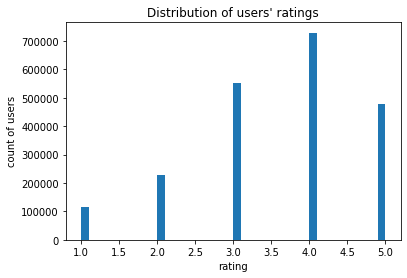

In [0]:
data['rating'].plot.hist(bins=40)
plt.title("Distribution of users' ratings")
plt.ylabel('count of users')
plt.xlabel('rating');

From the above we can see people tend to rate generously more often than not.

Analysis of data by ages is sometimes very enlightening. Let us try to find how many people in the different ages watched the movie **One Flew Over the Cuckoo's Nest (1975)**?

In [0]:
by_age = data[data['title']=='One Flew Over the Cuckoo\'s Nest (1975)'].groupby(['title','age']).agg({'rating': [np.size]})
by_age

rating
                                             size
title                                  age       
One Flew Over the Cuckoo's Nest (1975) 1       36
                                       18     249
                                       25     582
                                       35     403
                                       45     191
                                       50     145
                                       56     119

Now Let's see the trend in how old people rate movies in general.

In [0]:
by_old_age = data[data['age_group']=='Above 45'].groupby('title').agg({'rating': [np.mean]})
by_old_age

,rating
,mean
title,
"$1,000,000 Duck (1971)",2.750000
'Night Mother (1986),3.750000
'Til There Was You (1997),2.600000
"'burbs, The (1989)",3.100000
...And Justice for All (1979),3.674419
...,...
Your Friends and Neighbors (1998),3.500000
Zachariah (1971),5.000000


Showing only 50 movies for clarity. The data plotted gives us an idea about which movies old people favour against the ones they do not.

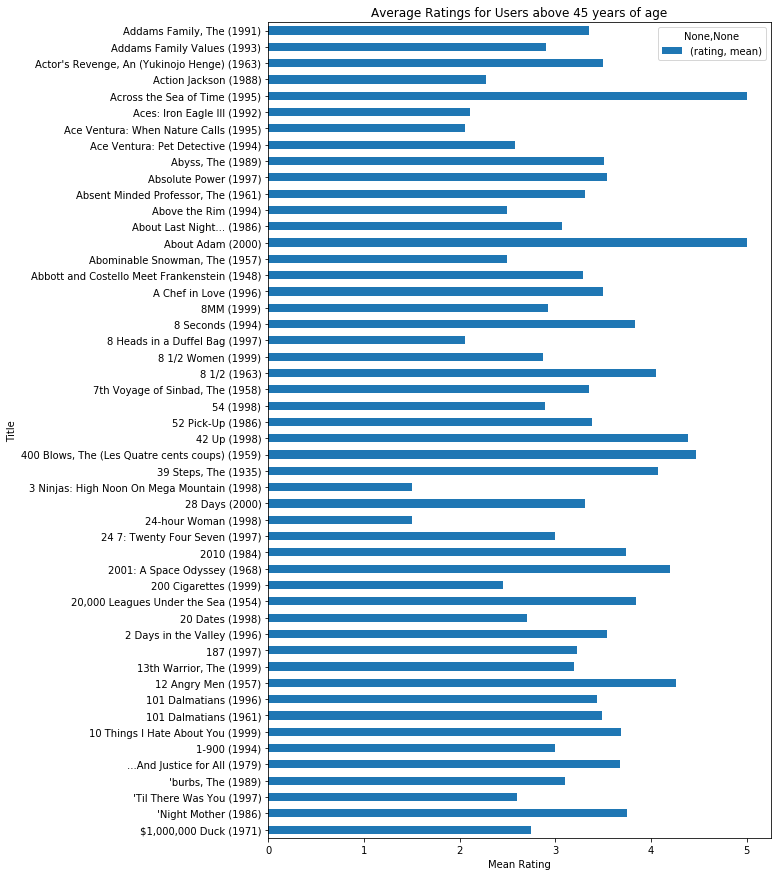

In [0]:
top_movies = by_old_age.sort_values(by='title')[:50]
top_movies.plot(kind='barh', figsize=[9, 15])
plt.title('Average Ratings for Users above 45 years of age')
plt.ylabel('Title')
plt.xlabel('Mean Rating');

Let us see the aggregate trends for younger people.

In [0]:
young_mean_rating = data[data['age_group']=='Under 18'].groupby('title').agg({'rating': [np.mean]})
young_mean_rating

,rating
,mean
title,
"$1,000,000 Duck (1971)",3.000000
'Night Mother (1986),3.600000
'Til There Was You (1997),2.700000
"'burbs, The (1989)",3.271739
...And Justice for All (1979),3.375000
...,...
Your Friends and Neighbors (1998),3.558824
"Zed & Two Noughts, A (1985)",2.000000


The graph looks like this for the first 5 movie alphabetically.



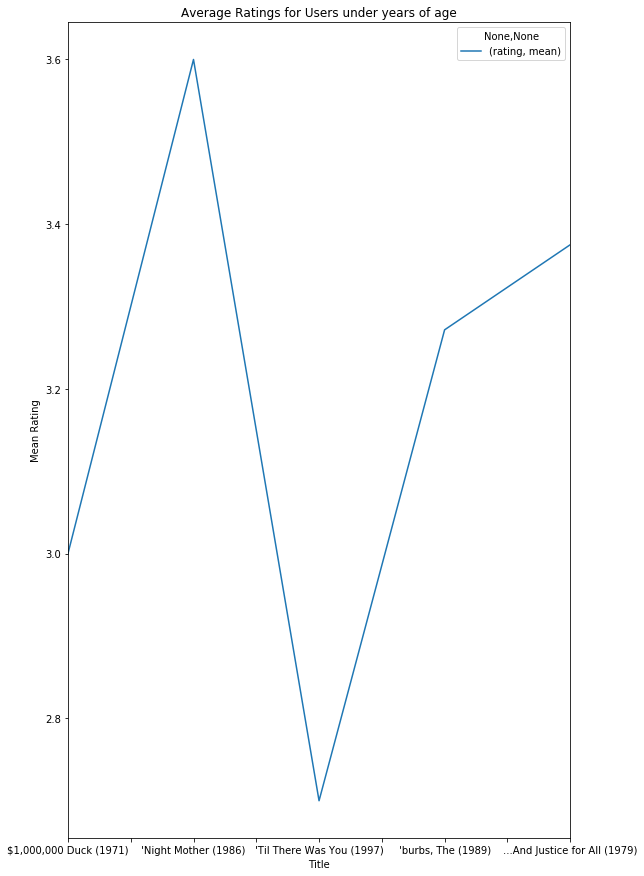

In [0]:
top_movies = young_mean_rating.sort_values(by='title')[:5]
top_movies.plot(kind='line', figsize=[9, 15])
plt.title('Average Ratings for Users under years of age')
plt.xlabel('Title')
plt.ylabel('Mean Rating');